In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv

import matplotlib.pyplot as plt

In [ ]:
config_file = '../models/s2anet_r50_fpn_1x_dota.py'
# download the checkpoint from model zoo and put it in `checkpoints/`
checkpoint_file = '../models/s2anet_r50_fpn_1x_converted-11c9c5f4.pth'

In [5]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')

In [39]:
! wget -O test.jpg https://a.d-cd.net/53017bas-960.jpg

--2021-02-09 13:37:58--  https://a.d-cd.net/53017bas-960.jpg
Resolving a.d-cd.net (a.d-cd.net)... 146.255.192.81, 146.255.192.80
Connecting to a.d-cd.net (a.d-cd.net)|146.255.192.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105327 (103K) [image/jpeg]
Saving to: 'test.jpg'

test.jpg            100%[===================>] 102.86K   201KB/s    in 0.5s    

2021-02-09 13:38:00 (201 KB/s) - 'test.jpg' saved [105327/105327]



In [40]:
dota_colormap = [
    (54, 67, 244),
    (99, 30, 233),
    (176, 39, 156),
    (183, 58, 103),
    (181, 81, 63),
    (243, 150, 33),
    (212, 188, 0),
    (136, 150, 0),
    (80, 175, 76),
    (74, 195, 139),
    (57, 220, 205),
    (59, 235, 255),
    (0, 152, 255),
    (34, 87, 255),
    (72, 85, 121)]

hrsc2016_colormap = [(212, 188, 0)]

In [54]:
import argparse
import os
import os.path as osp
import pdb
import random

import cv2
import mmcv
from mmcv import Config

from mmdet.apis import init_detector, inference_detector
from mmdet.core import rotated_box_to_poly_single
from mmdet.datasets import build_dataset


def show_result_rbox(img,
                     detections,
                     class_names,
                     scale=1.0,
                     threshold=0.2,
                     colormap=None,
                     show_label=False):
    assert isinstance(class_names, (tuple, list))
    if colormap:
        assert len(class_names) == len(colormap)
    img = mmcv.imread(img)
    color_white = (255, 255, 255)

    for j, name in enumerate(class_names):
        if colormap:
            color = colormap[j]
        else:
            color = (random.randint(0, 256), random.randint(0, 256), random.randint(0, 256))
        try:
            dets = detections[j]
        except:
            pdb.set_trace()
        # import ipdb;ipdb.set_trace()
        for det in dets:
            score = det[-1]
            det = rotated_box_to_poly_single(det[:-1])
            bbox = det[:8] * scale
            if score < threshold:
                continue
            bbox = list(map(int, bbox))

            for i in range(3):
                cv2.line(img, (bbox[i * 2], bbox[i * 2 + 1]), (bbox[(i + 1) * 2], bbox[(i + 1) * 2 + 1]), color=color,
                         thickness=2, lineType=cv2.LINE_AA)
            cv2.line(img, (bbox[6], bbox[7]), (bbox[0], bbox[1]), color=color, thickness=2, lineType=cv2.LINE_AA)
            if show_label:
                cv2.putText(img, '%s %.3f' % (class_names[j], score), (bbox[0], bbox[1] + 10),
                            color=color_white, fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5)
    return img

In [60]:
img = 'test.jpg'
result = inference_detector(model, img)

In [61]:
out_img = show_result_rbox(img,
                       result,
                       model.CLASSES,
                       scale=1.0,
                       threshold=0.3,
                       colormap=dota_colormap)

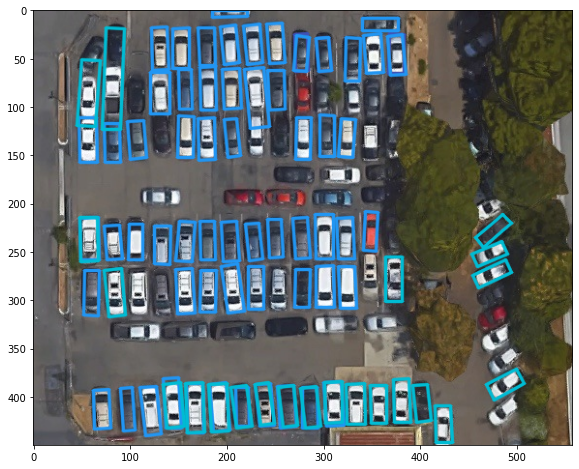

In [62]:
plt.figure(figsize=(10, 8))
plt.imshow(out_img[:,:,::-1])